In [41]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv('5.csv', delimiter=',')

In [43]:
df

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,127.0.0.1,127.0.0.1,UDP,56,65310→13337Len=24
1,2,2.457669,127.0.0.1,127.0.0.1,UDP,56,65310→13337Len=24
2,3,5.196244,127.0.0.1,127.0.0.1,UDP,56,65310→13337Len=24
3,4,7.544762,127.0.0.1,127.0.0.1,UDP,56,65310→13337Len=24
4,5,11.072146,127.0.0.1,127.0.0.1,UDP,56,65310→13337Len=24
...,...,...,...,...,...,...,...
223,224,398.770833,127.0.0.1,127.0.0.1,UDP,47,65310→13337Len=15
224,225,400.230452,127.0.0.1,127.0.0.1,UDP,47,65310→13337Len=15
225,226,401.514238,127.0.0.1,127.0.0.1,UDP,47,65310→13337Len=15
226,227,402.013847,127.0.0.1,127.0.0.1,UDP,47,65310→13337Len=15


In [45]:
def time_interval(df):
    interval = []
    interval.append(0)
    i = 1
    while i < len(df):
        t = (df.Time[i]-df.Time[i-1])
        interval.append(t)
        i = i + 1
    df['interval'] = interval
    return df

In [46]:
df = time_interval(df)

In [66]:
df

,No.,Time,Source,Destination,Protocol,Length,Info,interval
0,1,0.000000,127.0.0.1,127.0.0.1,UDP,56,65310→13337Len=24,0.000000
1,2,2.457669,127.0.0.1,127.0.0.1,UDP,56,65310→13337Len=24,2.457669
2,3,5.196244,127.0.0.1,127.0.0.1,UDP,56,65310→13337Len=24,2.738575
3,4,7.544762,127.0.0.1,127.0.0.1,UDP,56,65310→13337Len=24,2.348518
4,5,11.072146,127.0.0.1,127.0.0.1,UDP,56,65310→13337Len=24,3.527384
...,...,...,...,...,...,...,...,...
223,224,398.770833,127.0.0.1,127.0.0.1,UDP,47,65310→13337Len=15,0.516533
224,225,400.230452,127.0.0.1,127.0.0.1,UDP,47,65310→13337Len=15,1.459619
225,226,401.514238,127.0.0.1,127.0.0.1,UDP,47,65310→13337Len=15,1.283786
226,227,402.013847,127.0.0.1,127.0.0.1,UDP,47,65310→13337Len=15,0.499609


1. Построить гистограмму отсортированных по возрастанию длин межпакетных интервалов. Определить значение вероятности присутствия скрытого канала в системе.

Text(0.5, 1.0, 'Распределение длины межпакетных интервалов для всего трафика')

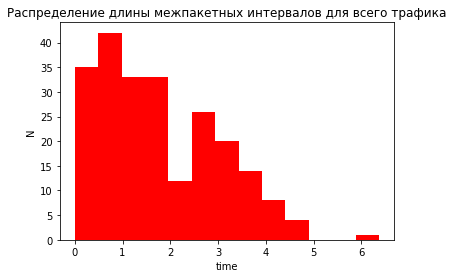

In [67]:
plt.hist(df['interval'], color='r', bins=13)
plt.xlabel('time')
plt.ylabel('N')
plt.title('Распределение длины межпакетных интервалов для всего трафика')

In [48]:
counts, bin_edges = np.histogram(df['interval'], bins=13)

In [49]:
counts

array([35, 42, 33, 33, 12, 26, 20, 14,  8,  4,  0,  0,  1], dtype=int64)

In [50]:
P = round((1 - (12/42)) * 100, 2)
print('вероятность наличия скрытого канала равна = ' + str(P) + '%')

вероятность наличия скрытого канала равна = 71.43%


2. Построить гистограмму отсортированных по возрастанию длин межпакетных интервалов для трафика, в который включен только промежуток с передачей скрытого сообщения. Определить значение вероятности присутствия скрытого канала в системе.

Text(0.5, 1.0, 'Распределение длины межпакетных интервалов для трафика с скрытом каналом')

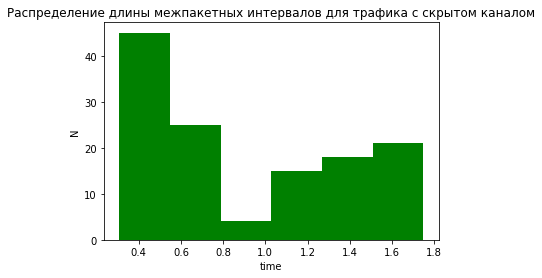

In [68]:
df1 = df[100:]
plt.hist(df1['interval'], color='g', bins=6)
plt.xlabel('time')
plt.ylabel('N')
plt.title('Распределение длины межпакетных интервалов для трафика с скрытом каналом')

In [52]:
counts1, bin_edges1 = np.histogram(df1['interval'], bins=6)
counts1

array([45, 25,  4, 15, 18, 21], dtype=int64)

In [53]:
P1 = round((1 - (4/45)) * 100, 2)
print('вероятность наличия скрытого канала равна = ' + str(P1) + '%')

вероятность наличия скрытого канала равна = 91.11%


3. Разработать средство декодирования скрытого сообщения и определить, какое скрытое сообщение было передано.

В качетсве порогового значения возьмём 1, так как при этом значении достигается минимум на гистограмме и стреднее значение последовательности интервалов равно примерно этому же значению.


In [58]:
covert_message = ''
for i in range(100, len(df)):
    if df.interval[i] < 1:
        covert_message += '1'
    else:
        covert_message += '0'

In [59]:
covert_message

'01110100011000110110001101011111011011010110010101110011011100110110000101100111011001010101111101101001011100000110010001110011'

In [64]:
def decode_binary_string(s):
    return ''.join(chr(int(s[i*8:i*8+8],2)) for i in range(len(s)//8))

In [65]:
decode_binary_string(covert_message)

'tcc_message_ipds'